# k-NN

## 1. 개념
- K-Nearest Neighbor (사례기반추론, 최근접 이웃 알고리즘)
- 새로운 데이터 포인트에 가장 거리가 가까운(유사도⬆️) k개의 이웃을 찾고, 이를 기준으로 분류하는 알고리즘
- k(최근접 이웃)의 개수에 따라 분류 결과가 달라지기 때문에 최적의 k를 찾는 것이 중요함
    * ![img](https://miro.medium.com/max/506/0*QyWp7J6eSz0tayc0.png)
    * k ⬆️ : 결정경계가 부드러워짐, 모델 복잡도가 낮아짐 => 과소적합 우려
    * k ⬇️ : 결정경계가 각짐, 모델 복잡도가 높아짐 => 과대적합 우려
    * k = 1 : 습 데이터 셋에 잘 맞는 복잡한 모델을 만듬

## 2. 장단점
- 장점
    1. 단순하고 효율적
    2. 훈련 단계가 빠름
    3. 기저 데이터 분포에 대한 가정을 하지 않음
    4. 수치 기반 데이터 분류 작업에서 성능이 우수함
    5. 특별한 훈련이 없기에 lazy learning(게으른 학습)이라고도 불림
- 단점
    1. 결과 설명력이 떨어져 해석이 어려움
    2. 적절한 k의 선택이 중요함
    3. 데이터가 많아지면 분류 단계가 느림
    4. 컬럼 데이터의 정규화 과정 및 결측값 처리 등 추가 전처리가 필요함

## 3. 거리(유사도)의 계산방법
- 유클리드 거리(Euclidean distance)
    * L2 Distance
    * 각 차원의 차를 제곱해서 모두 더한 값의 제곱근
    * ![img](https://hleecaster.com/wp-content/uploads/2019/12/dis2.png)
    * ![img](https://hleecaster.com/wp-content/uploads/2019/12/dis3.png)
    * ![img](https://hleecaster.com/wp-content/uploads/2019/12/dis1.png)
- 맨해튼 거리(Manhattan distance)
    * L1 Distance
    * 절대값을 바로 합산한 값
    * ![img](https://hleecaster.com/wp-content/uploads/2019/12/dis4.png)
    * ![img](https://hleecaster.com/wp-content/uploads/2019/12/dis5.png)
    * ![img](https://hleecaster.com/wp-content/uploads/2019/12/dis6.png)


### [실습] KNN 신용카드 사기거래 분류  

In [1]:
# titnaic 데이터셋 불러오기
import pandas as pd
df = pd.read_csv("datasets/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [3]:
df.shape

(100000, 31)

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,42433.231550,-0.262177,-0.032307,0.676217,0.162579,-0.278515,0.094065,-0.108711,0.056019,-0.046472,...,-0.030865,-0.109090,-0.037024,0.008969,0.132206,0.026658,0.000624,0.001736,97.961222,0.00223
std,17044.922359,1.859226,1.656981,1.322926,1.349263,1.356372,1.301349,1.210919,1.207526,1.121396,...,0.718890,0.634306,0.632908,0.595267,0.441080,0.494539,0.393742,0.325162,264.623031,0.04717
min,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-9.390980,-9.617915,0.000000,0.00000
25%,33471.750000,-1.028141,-0.598697,0.176770,-0.711468,-0.898664,-0.647830,-0.600205,-0.137456,-0.698812,...,-0.224512,-0.531327,-0.176415,-0.323714,-0.131788,-0.325102,-0.062533,-0.005355,7.570000,0.00000
50%,44299.000000,-0.260557,0.078316,0.753976,0.192550,-0.314382,-0.157014,-0.069096,0.074136,-0.119083,...,-0.057669,-0.083865,-0.049238,0.064997,0.170110,-0.070333,0.009833,0.023318,26.310000,0.00000
75%,55851.250000,1.153324,0.735790,1.376320,1.032416,0.249727,0.486353,0.414662,0.360529,0.558314,...,0.119186,0.308337,0.081526,0.406280,0.419929,0.300675,0.083027,0.076569,89.000000,0.00000
max,67375.000000,1.960497,18.902453,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,10.503090,19.002942,4.014444,5.541598,3.517346,12.152401,33.847808,19656.530000,1.00000


In [5]:
# 분류를 기준으로한 평균값들
df.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,42446.091725,-0.249296,-0.041581,0.695399,0.151978,-0.269347,0.098268,-0.094923,0.050076,-0.040116,...,0.043923,-0.032534,-0.109059,-0.036526,0.009226,0.132042,0.026479,-0.000542,0.001653,97.920523
1,36679.197309,-6.025538,4.117342,-7.906295,4.906056,-4.380838,-1.786228,-6.277658,2.715160,-2.890311,...,0.350500,0.715742,-0.123071,-0.260011,-0.105969,0.205242,0.106851,0.522539,0.038871,116.170852


In [6]:
# 클래스별 개수 확인
df["Class"].value_counts()

0    99777
1      223
Name: Class, dtype: int64

In [7]:
# 독립 & 종속 변수 설정
train_cols = df.columns[1:29]
X = df[train_cols]
y = df["Class"]

In [8]:
# 언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
y_samp = pd.DataFrame(data=y_sample, columns=["Class"])
df2 = pd.concat([X_samp, y_samp], axis=1)

# 샘플링 결과 확인
df2["Class"].value_counts()

0    223
1    223
Name: Class, dtype: int64

In [9]:
# 종속 & 독립 변수 재설정
train_cols = df.columns[1:29]
X = X_samp[train_cols]
y = y_samp["Class"]

In [10]:
# 학습 & 검증용 데이터셋 분류
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

[0.8777777777777778, 0.9444444444444444, 0.9333333333333333, 0.9444444444444444, 0.9333333333333333, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9222222222222223, 0.9444444444444444]


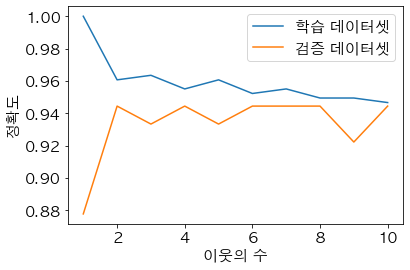

In [12]:
# KNN 하이퍼파라미터 튜닝
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
# 한글폰트 설정
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

train_rate = []
test_rate = []

# k 범위
neighbors = range(1, 11)

#최적의 k 찾기
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n) #모델선언
    knn.fit(X_train, y_train) #학습
    train_rate.append(knn.score(X_train, y_train)) #학습정확도
    test_rate.append(knn.score(X_test, y_test)) #검증정확도
    
print(test_rate)

plt.rcParams["font.size"] = 15
plt.plot(neighbors, train_rate, label="학습 데이터셋")
plt.plot(neighbors, test_rate, label="검증 데이터셋")
plt.ylabel("정확도")
plt.xlabel("이웃의 수")
plt.legend()
    
    
    

In [13]:
# 최적의 k가 적용되었을때의 정확도
model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [14]:
# 모델 정확도
import numpy as np
pred = model.predict(X_test)
print("학습용:", model.score(X_train, y_train))
print("검증용:", model.score(X_test, y_test))
print("검증용:", np.mean(pred == y_test))

학습용: 0.9606741573033708
검증용: 0.9444444444444444
검증용: 0.9444444444444444


In [15]:
# Confusion Matrix 출력
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
cm = confusion_matrix(y_test, pred)
cm

array([[47,  2],
       [ 3, 38]])

In [16]:
df_cm = pd.DataFrame(cm, index=[0,1], columns=[0,1])
df_cm

,0,1
0,47,2
1,3,38


<AxesSubplot:title={'center':'Confusion Matrix'}>

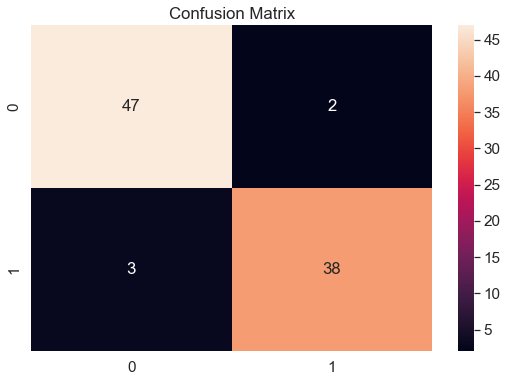

In [18]:
# heatmap 그리기
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

sns.set(font_scale=1.4)
plt.figure(figsize=(9, 6))
plt.title("Confusion Matrix")
sns.heatmap(df_cm, annot=True, fmt="d")